In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the datasets

data_df = pd.read_csv('../data/data.csv')
rating_df = pd.read_csv('../data/rating.csv')
raw_data_df = pd.read_csv('../data/traffic.csv')
domain_loc = pd.read_csv('../data/domains_location.csv')


In [4]:
print('Info for Data frame')
data_df.info()
print('Info for Data frame')
rating_df.info()
print('Info for Raw Data frame')
raw_data_df.info()
print('Info for Domains Location')
domain_loc.info()

Info for Data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB
Info for Data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----

In [5]:
# Explore the structure and Content of the dataset
print("Data.csv:")
print(data_df.head())
print("\nRating.csv:")
print(rating_df.head())
print("\nRaw-data.csv:")
print(raw_data_df.head())
print("\ndomain_loc.csv:")
print(domain_loc.head())

Data.csv:
   article_id source_id                   source_name  \
0       89541       NaN  International Business Times   
1       89542       NaN                    Prtimes.jp   
2       89543       NaN                      VOA News   
3       89545       NaN            The Indian Express   
4       89547       NaN           The Times of Israel   

                                       author  \
0                              Paavan MATHEMA   
1                                         NaN   
2  webdesk@voanews.com (Agence France-Presse)   
3                                   Editorial   
4                                 Jacob Magid   

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham...   

               

In [6]:
# Understand the variables/columns present in the dataset
print("\nData.csv columns:", data_df.columns)
print("Rating.csv columns:", rating_df.columns)
print("Raw-data.csv columns:", raw_data_df.columns)
print("Domains_location.csv columns:", domain_loc.columns)


Data.csv columns: Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')
Rating.csv columns: Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')
Raw-data.csv columns: Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')
Domains_location.csv columns: Index(['SourceCommonName', 'location', 'Country'], dtype='object')


In [7]:
## Check for Duplication

In [8]:
data_df.nunique()

article_id      101832
source_id           61
source_name       2379
author           20575
title            98304
description      98488
url             101832
url_to_image     75167
published_at     80508
content          97185
category           257
full_content     54143
dtype: int64

In [9]:
# Missing Values Calculation interms of percentage

(data_df.isnull().sum()/(len(data_df)))*100

article_id       0.000000
source_id       76.754448
source_name      0.000000
author           7.799763
title            0.037960
description      0.363464
url              0.000000
url_to_image     5.337129
published_at     0.000000
content          0.000000
category         0.039858
full_content    44.548517
dtype: float64

In [10]:
# Since the source Id column and Full Content columns has the largest missing values it is possible to remove them
data_df.drop(columns=['source_id', 'full_content'], inplace=True, axis=1)

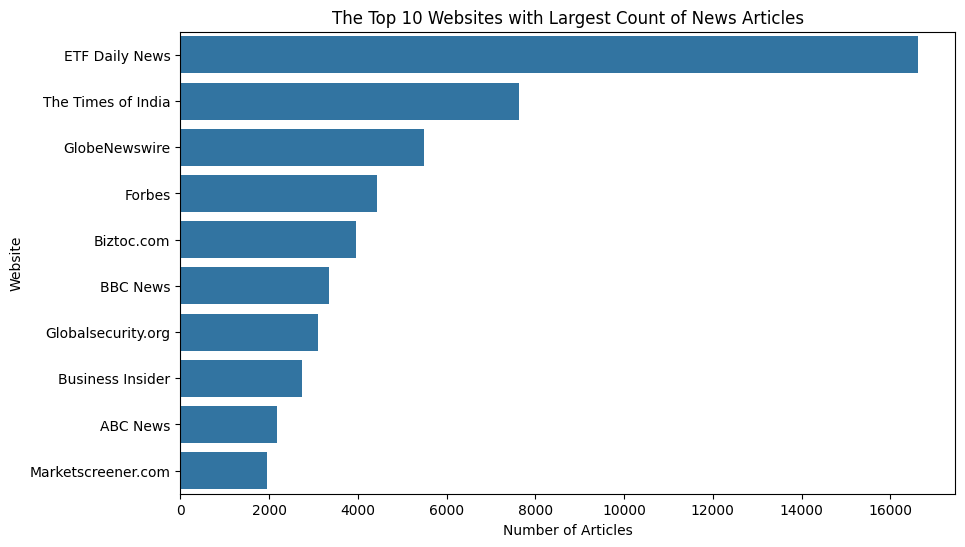

In [11]:
#Top and bottom 10 websites with the largest count of news articles
the_top_10_websites = data_df['source_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=the_top_10_websites.values, y=the_top_10_websites.index)
plt.title('The Top 10 Websites with Largest Count of News Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Website')
plt.show()

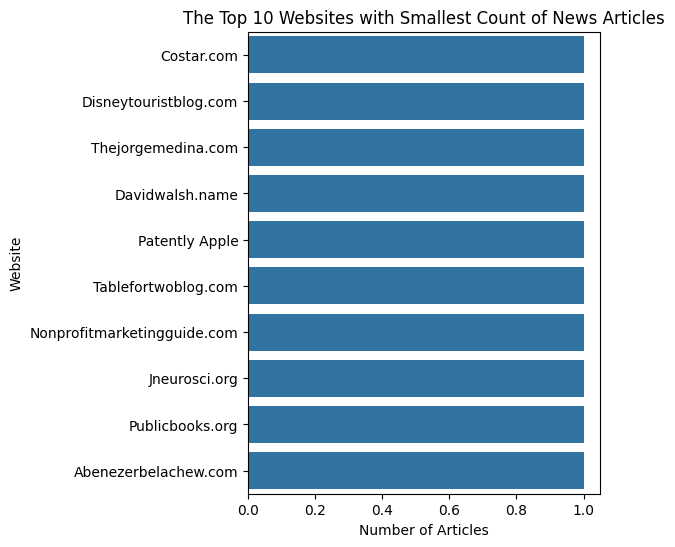

In [12]:
# bottom 10 websites with the largest count of news articles
bottom_10_websites = data_df['source_name'].value_counts().nsmallest(10)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_10_websites.values, y=bottom_10_websites.index,legend=False)
plt.title('The Top 10 Websites with Smallest Count of News Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Website')
plt.show()

In [13]:
raw_data_df.dropna(subset=['Domain', 'GlobalRank'], inplace=True)

top_traffic_websites = raw_data_df.sort_values(by='GlobalRank').head(10)

print(top_traffic_websites[['Domain', 'GlobalRank']])

                 Domain  GlobalRank
0            google.com           1
1          facebook.com           2
2           youtube.com           3
3           twitter.com           4
4         instagram.com           5
5          linkedin.com           6
6             apple.com           7
7         microsoft.com           8
8  googletagmanager.com           9
9         wikipedia.org          10


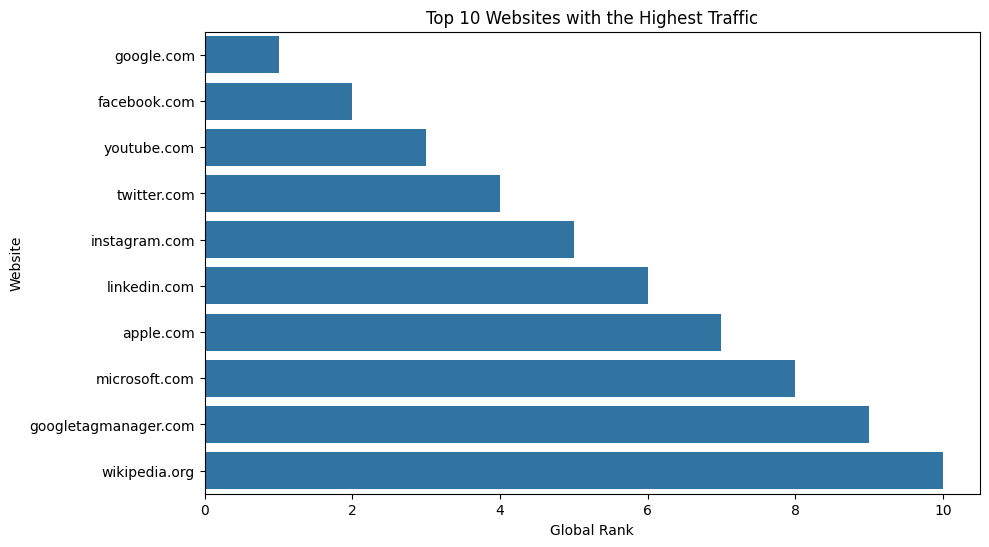

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GlobalRank', y='Domain', data=top_traffic_websites)
plt.xlabel('Global Rank')
plt.ylabel('Website')
plt.title('Top 10 Websites with the Highest Traffic')
plt.show()

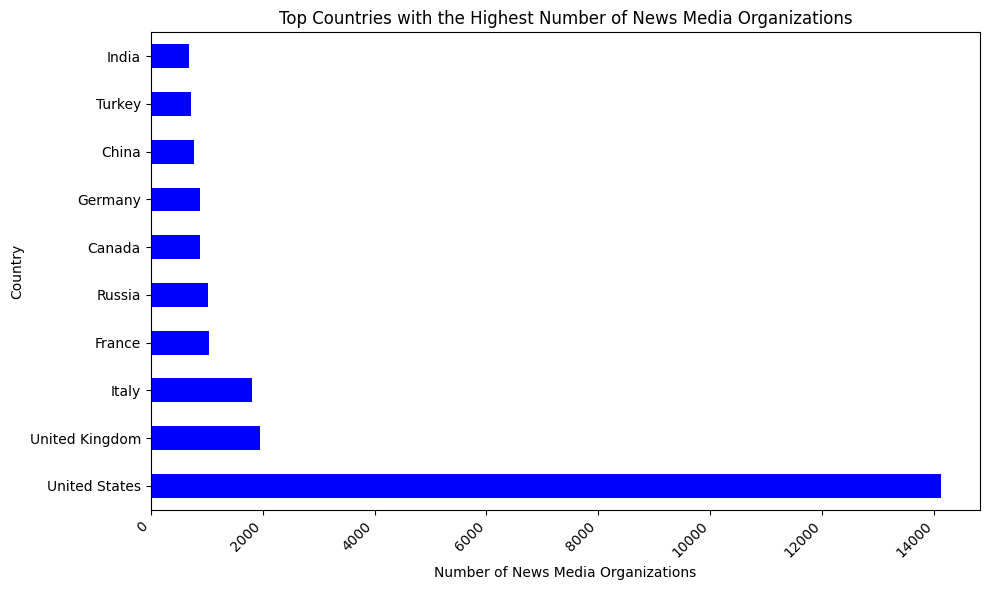

In [15]:
#Countries with the highest number of news media organisations which is represented by domains in the data)

domain_loc.dropna(subset=['Country', 'SourceCommonName'], inplace=True)
country_counts = domain_loc['Country'].value_counts()
top_countries = country_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='blue')
plt.ylabel('Country')
plt.xlabel('Number of News Media Organizations')
plt.title('Top Countries with the Highest Number of News Media Organizations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

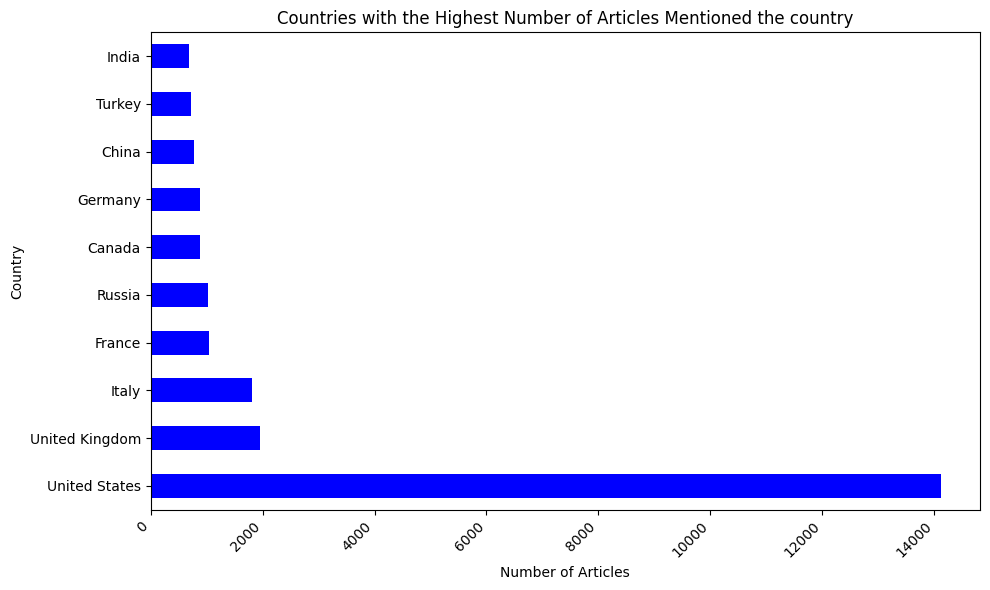

In [16]:
## Countries with the Highest Number of Articles Mentioning Them

# Filter articles to include only those that mention countries
articles_with_countries = domain_loc.dropna(subset=['Country'])

# Split the 'countries' column into a list of countries
articles_with_countries['Country'] = articles_with_countries['Country'].apply(lambda x: x.split(','))

# Create a list of all mentioned countries
all_countries = [country.strip() for sublist in articles_with_countries['Country'] for country in sublist]

# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts()

# Plotting
plt.figure(figsize=(10, 6))
country_counts.head(10).plot(kind='barh', color='blue')  # Plot top 10 countries
plt.ylabel('Country')
plt.xlabel('Number of Articles')
plt.title('Countries with the Highest Number of Articles Mentioned the country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
# Returns a list of African countries.
def get_world_countries():
    """
    Returns a list of African countries.
    """
    african_countries = [
        'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
        'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Djibouti',
        'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
        'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
        'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
        'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
        'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
        'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
    ]

    eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 
                    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 
                    'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
                    'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
                    'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
    
    middle_east_countries = ['Bahrain', 'Iran', 'Iraq', 'Israel', 
                             'Jordan', 'Kuwait', 'Lebanon', 'Oman', 
                             'Palestine', 'Qatar', 'Saudi Arabia', 
                             'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
    
    us_countries = ['United States', 'USA', 'U.S.', 'Canada', 'Mexico', 'Argentina', 'Brazil']
    
    indo_china_countries = ['China', 'Japan', 'India', 'Indonesia', 'North Korea', 'South Korea']


    return african_countries, eu_countries, middle_east_countries, us_countries, indo_china_countries



In [76]:
### Websites which report news content about the specified region
african_countries, eu_countries, middle_east_countries, us_countries, indo_china_countries = get_world_countries()
# Combine the regions and their respective countries into a dictionary
region_countries_dict = {
    'Africa': african_countries,
    'EU': eu_countries,
    'Middle East': middle_east_countries,
    'US': us_countries,
    'China': indo_china_countries
}


# Filter articles containing mentions of the specified regions
articles_about_regions = data_df[data_df['content'].str.contains('|'.join(sum(region_countries_dict.values(), [])))]

# Get the websites that reported news content about the specified regions
websites_which_reports_about_regions = articles_about_regions['source_name'].unique()

print("Websites reporting news content about the specified regions:")
print(websites_which_reports_about_regions)


Websites reporting news content about the specified regions:
['The Times of Israel' 'Al Jazeera English' 'The Indian Express'
 'ABC News (AU)' 'CNA' 'Hurriyet Daily News' 'RT'
 'International Business Times' 'BusinessLine' 'Breitbart News'
 'Energycentral.com' 'Bangkok Post' 'Rlsbb.ru' 'DW (English)' 'Skift'
 'VOA News' 'CBS News' 'Biztoc.com' 'The Punch' 'Newsit.gr' 'BBC News'
 'Japan Today' 'Newsweek' 'The Times of India' 'Jalopnik' 'NDTV News'
 'Marketscreener.com' 'The Boston Globe' 'CBC News' 'Aajtak.in'
 'TheJournal.ie' 'Thehillstimes.in' 'Foreign Policy' 'ABC News'
 'Globalsecurity.org' 'Yourmileagemayvary.com' 'HuffPost' 'CNN' 'EURACTIV'
 'The Diplomat' 'The BMJ' 'CNET' 'The Washington Post' 'Ars Technica'
 'Business Insider' 'ReadWrite' 'Time' 'ESPN' 'Rolling Stone' 'Politico'
 'MacRumors' 'Phys.Org' 'Forbes' 'Deadline' 'Sky Sports' 'ESPN Cric Info'
 'Substack.com' 'Bleacher Report' 'The Daily Caller' 'Sputnikglobe.com'
 'Crooksandliars.com' 'Luxurylaunches.com' 'Fly4free.com'

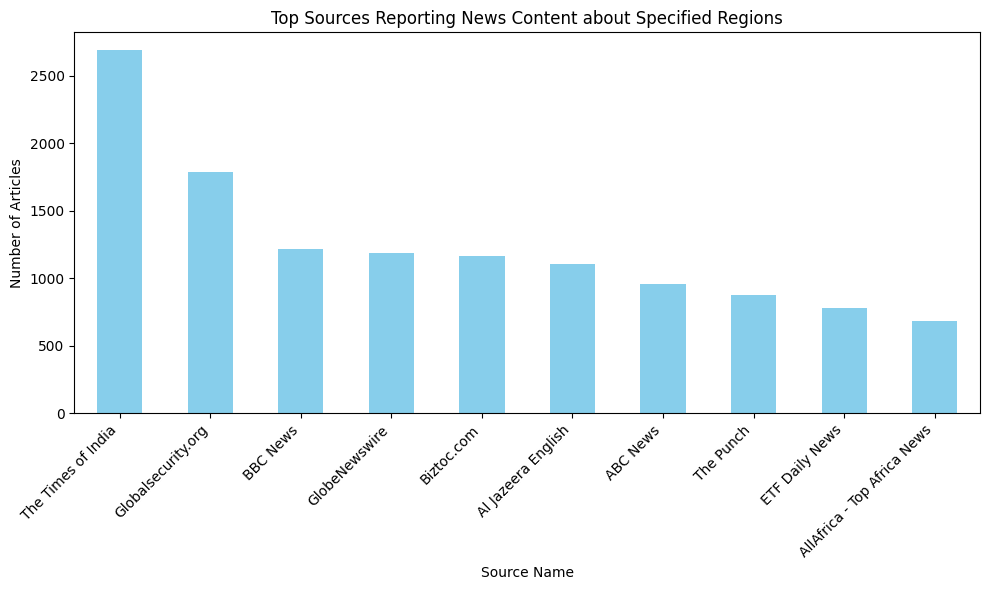

In [75]:
# Define dictionaries mapping countries to their respective regions


african_countries, eu_countries, middle_east_countries, us_countries, indo_china_countries = get_world_countries()
# Combine the regions and their respective countries into a dictionary
region_countries_dict = {
    'Africa': african_countries,
    'EU': eu_countries,
    'Middle East': middle_east_countries,
    'US': us_countries,
    'China': indo_china_countries
}

# Filter articles containing mentions of the specified regions
articles_about_regions = data_df[data_df['content'].str.contains('|'.join(sum(region_countries_dict.values(), [])))]

# Get the source names that reported news content about the specified regions
sources_reporting_about_regions = articles_about_regions['source_name']

# Count the occurrences of each source
source_counts = sources_reporting_about_regions.value_counts()

# Plotting
plt.figure(figsize=(10, 6))
source_counts.head(10).plot(kind='bar', color='skyblue')  # Plot top 10 sources
plt.xlabel('Source Name')
plt.ylabel('Number of Articles')
plt.title('Top Sources Reporting News Content about Specified Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
rating_df

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral


In [81]:
# Since the source Id column and url_to_image columns has the largest missing values it is possible to remove them
rating_df.drop(columns=['source_id', 'author', 'url_to_image'], inplace=True, axis=1)

In [85]:
#Top and Bottom 10 websites with Mean sentiment

print(rating_df['title_sentiment'].dtype)

#This attempts to convert the column to numeric, replacing non-numeric values with NaN.
rating_df['title_sentiment'] = pd.to_numeric(rating_df['title_sentiment'], errors='coerce')  # Coerce errors to NaN
website_sentiment = rating_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var']).reset_index()
# Print results (showing websites with high/low sentiment can be achieved through sorting)
print("Website Sentiment Statistics (Mean, Median, Variance):")
print(website_sentiment.to_string(index=True))



float64
Website Sentiment Statistics (Mean, Median, Variance):
                     source_name  mean  median  var
0                       ABC News   NaN     NaN  NaN
1             Al Jazeera English   NaN     NaN  NaN
2    AllAfrica - Top Africa News   NaN     NaN  NaN
3                Android Central   NaN     NaN  NaN
4                       BBC News   NaN     NaN  NaN
5                    Boing Boing   NaN     NaN  NaN
6               Business Insider   NaN     NaN  NaN
7                            CNA   NaN     NaN  NaN
8                            CNN   NaN     NaN  NaN
9                       Deadline   NaN     NaN  NaN
10                Digital Trends   NaN     NaN  NaN
11                ETF Daily News   NaN     NaN  NaN
12                      Euronews   NaN     NaN  NaN
13                        Forbes   NaN     NaN  NaN
14                   Gizmodo.com   NaN     NaN  NaN
15            Globalsecurity.org   NaN     NaN  NaN
16                 GlobeNewswire   NaN     NaN  NaN
1

In [84]:
# Sort websites by sentiment metric (e.g., mean sentiment)
website_sentiment_sorted_mean = website_sentiment.sort_values(by='mean', ascending=False)  # Sort by descending mean
# Print top/bottom 10 websites by mean sentiment
print("\nTop 10 Websites by Mean Sentiment (Descending):")
print(website_sentiment_sorted_mean.head(10))

print("\nBottom 10 Websites by Mean Sentiment (Ascending):")
print(website_sentiment_sorted_mean.tail(10))


Top 10 Websites by Mean Sentiment (Descending):
                   source_name  mean  median  var
0                     ABC News   NaN     NaN  NaN
1           Al Jazeera English   NaN     NaN  NaN
2  AllAfrica - Top Africa News   NaN     NaN  NaN
3              Android Central   NaN     NaN  NaN
4                     BBC News   NaN     NaN  NaN
5                  Boing Boing   NaN     NaN  NaN
6             Business Insider   NaN     NaN  NaN
7                          CNA   NaN     NaN  NaN
8                          CNN   NaN     NaN  NaN
9                     Deadline   NaN     NaN  NaN

Bottom 10 Websites by Mean Sentiment (Ascending):
           source_name  mean  median  var
19                 NPR   NaN     NaN  NaN
20            Phys.Org   NaN     NaN  NaN
21                  RT   NaN     NaN  NaN
22           ReadWrite   NaN     NaN  NaN
23  The Indian Express   NaN     NaN  NaN
24           The Punch   NaN     NaN  NaN
25  The Times of India   NaN     NaN  NaN
26           T

In [89]:
# Group by website and calculate statistics
website_sentiment = rating_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var']).reset_index()
print(website_sentiment)
sentiment_stats_by_website = rating_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var'])
print(sentiment_stats_by_website)
top_10_domains = data_df['source_name'].value_counts().head(10).index
print(top_10_domains)
top_10_domains_data = data_df[data_df['source_name'].isin(top_10_domains)]
print(top_10_domains_data)

                     source_name  mean  median  var
0                       ABC News   NaN     NaN  NaN
1             Al Jazeera English   NaN     NaN  NaN
2    AllAfrica - Top Africa News   NaN     NaN  NaN
3                Android Central   NaN     NaN  NaN
4                       BBC News   NaN     NaN  NaN
5                    Boing Boing   NaN     NaN  NaN
6               Business Insider   NaN     NaN  NaN
7                            CNA   NaN     NaN  NaN
8                            CNN   NaN     NaN  NaN
9                       Deadline   NaN     NaN  NaN
10                Digital Trends   NaN     NaN  NaN
11                ETF Daily News   NaN     NaN  NaN
12                      Euronews   NaN     NaN  NaN
13                        Forbes   NaN     NaN  NaN
14                   Gizmodo.com   NaN     NaN  NaN
15            Globalsecurity.org   NaN     NaN  NaN
16                 GlobeNewswire   NaN     NaN  NaN
17  International Business Times   NaN     NaN  NaN
18          

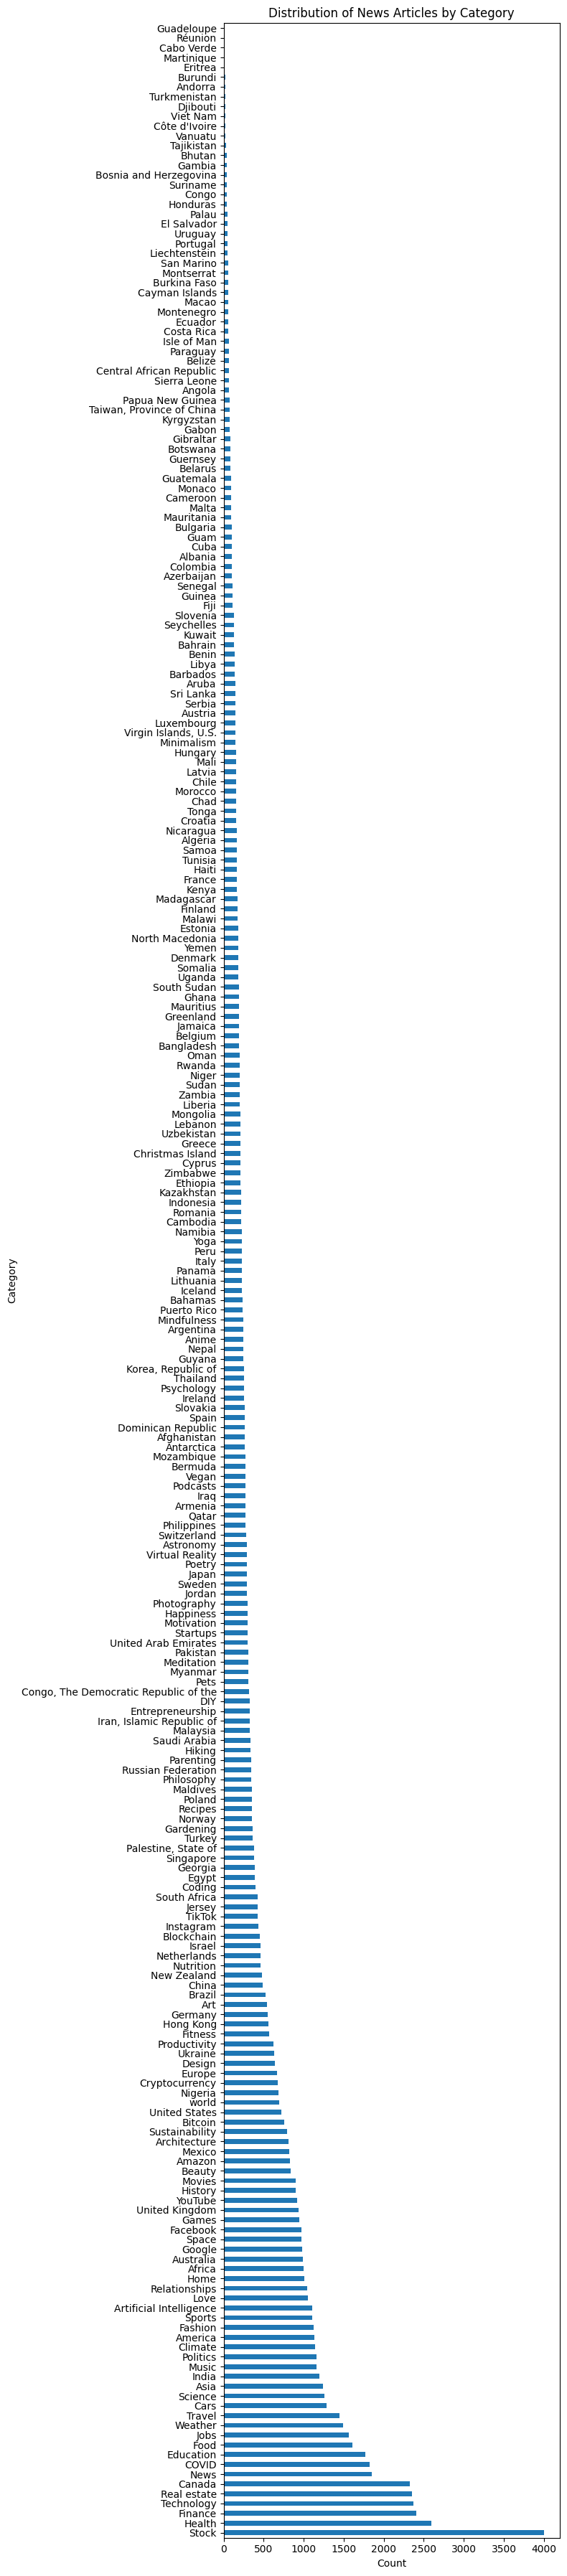

In [90]:
# Explore the distribution of different categories of financial news articles
category_counts = data_df['category'].value_counts()
plt.figure(figsize=(8, 36))  # Adjust the figure size for better vertical text display
category_counts.plot(kind='barh')  # Use barh for horizontal bar plot
plt.title("Distribution of News Articles by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()